# TP4 : Applications linéaires

Le but de ce TP est de comprendre la définition d'application linéaire entre deux espaces vectoriels, puis calculer l'image d'objets en deux dimensions suite à des applications linéaires, et finalement trouver le polygone obtenu de l'intersection d'un plan avec le cube $[0,1]^3$.

On importe d'abord les libraires dont on a besoin :

In [33]:
%matplotlib inline
from numpy import *
from numpy.linalg import *
from matplotlib.pyplot import *

# Commandes

Voici quelques commandes qui peuvent vous aider pendant la réalisation de ce TP :
- plot([$x_A,x_B$],[$y_A,y_B$]) représente le segment entre $A=(x_A,y_A)$ et $B=(x_B,y_B)$.
- X.append(n) rajoute le nombre n comme élément à la fin de la liste X.
- len(X) donne la longueur de la liste (ou array) X.
- X[i] selectionne la composante i de la liste (ou array) X.
- X.tolist() transforme l'array X en une liste.
- array(X) transforme une liste X en un array.

On vous rappelle que Python 2 ne considère pas les nombres comme floats par default. Donc on vous conseille de mettre toujours des décimales (2.0) ou utiliser la commande float().

# Exercice 1

Soient $E$ et $F$ deux espaces vectoriels sur un même corps $K$. Une application $f : E \rightarrow F$ est dite linéaire si elle vérifie à la fois :

\begin{equation}
\forall\, A,B \in E \hspace{15pt}f(A+B)=f(A)+f(B)
\end{equation}

et

\begin{equation}
\forall\, \lambda \in K,\,\forall\, A\in E \hspace{15pt}f(\lambda A)=\lambda f(A)
\end{equation}

Vérifiez les deux propriétés de linéarité des fonctions suivantes définies sur $\mathbb{R}^2$ ou $\mathbb{R}^3$, en calculant chaque côté des égalités précédentes pour les cas suivants :

\begin{align}
i)&\hspace{10pt}f(x,y,z) = (x+y+z,2x+y-z)\,\hspace{15pt}\text{ avec les points }A=(1,2,3),\,B=(1,-3,1)\text{ et }\lambda=\sqrt{2}\\
ii)&\hspace{10pt}f(x,y,z) = (x+y+z,-x+2y+2z)\,\hspace{15pt}\text{ avec les points }C=(-1,0,4),\,D=(2,-6,8)\text{ et }\lambda=3\\
iii)&\hspace{10pt}f(x,y)=(x-y,-3x+3y)\,\hspace{15pt}\text{ avec les points }E=(1,-3),\,F=(1,2)\text{ et }\lambda=0.3
\end{align}

In [34]:
def f(X):
    x,y,z = X
    return array([x+y+z,2*x+y-z])

def g(X):
    x,y,z = X
    return array([x+y+z,-x+2*y+2*z])

def h(X):
    x,y = X
    return array([x-y,-3*x+3*y])

A = array([1,2,3])
B = array([1,-3,1])
C = array([-1,0,4])
D = array([2,-6,8])
E = array([1,-3])
F = array([1,2])

print f(A+B)-(f(A)+f(B))
print g(C+D)-(g(C)+g(D))
print h(E+F)-(h(E)+h(F))

lam = sqrt(2)
print f(lam*A)-lam*f(A)
print f(lam*B)-lam*f(B)

lam = 3.
print g(lam*C)-lam*g(C)
print g(lam*D)-lam*g(D)

lam = 0.3
print h(lam*E)-lam*h(E)
print h(lam*F)-lam*h(F)



[0 0]
[0 0]
[0 0]
[  0.00000000e+00  -2.22044605e-16]
[ -4.44089210e-16  -4.44089210e-16]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]
[ 0.  0.]


De façon équivalente, on peut dire qu'une application $f$ est linéaire si et seulement si :

\begin{equation}
\forall \,X,Y \in E,\,\forall \,\lambda\in K,\hspace{10pt}f(X+\lambda Y)=f(X)+\lambda f(Y)
\end{equation}

Testez la linéarité des applications précédentes avec cette propriété (calculez chaque côté de l'égalité) pour les mêmes points et valeurs de $\lambda$ qu'à la section précédente.

In [35]:
lam = sqrt(2)
print f(A+lam*B)-(f(A)+lam*f(B))

lam = 3.
print g(C+lam*D)-(g(C)+lam*g(D))

lam = 0.3
print h(E+lam*F)-(h(E)+lam*h(F))

[ -8.88178420e-16  -4.44089210e-16]
[ 0.  0.]
[ 0.  0.]


# Exercice 2

Dans cet exercice on s'intéresse à la déformation d'un objet en deux dimensions suite à une application linéaire. D'abord, on cherche à écrire une fonction qui transforme un segment par une application linéaire $f$ donnée. On vous demande donc d'écrire une fonction nouveau_segment qui prend comme arguments l'application linéaire $f$ et les bouts du segment $A$ et $B$. La fonction doit nous rendre l'image du segment suite à l'application linéaire, c'est-à-dire, l'array $(f(A),f(B))$.

In [36]:
def nouveau_segment(fun,A,B):
    return array([f(A),f(B)])

Testez la fonction nouveau_segment avec l'application linéaire $f(x,y)=(x+1,y)$ et le segment de bouts $A=(1,0),\,B=(0,1)$. Représentez dans la même figure le segment initial et le nouveau segment.

[[ 2.  0.]
 [ 1.  1.]]


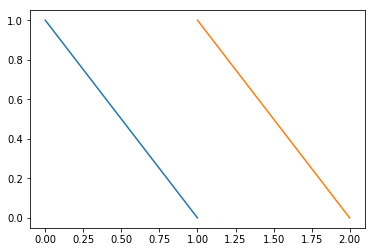

In [37]:
def f(X):
    x,y=X
    return array([x+1.,y])

print nouveau_segment(f,(1,0),(0,1))

Anew,Bnew = nouveau_segment(f,(1,0),(0,1))

plot([1,0],[0,1])
plot([Anew[0],Bnew[0]],[Anew[1],Bnew[1]])
show()

Maintenant on s'intéresse à calculer l'image d'un polygone suite à une application linéaire $f$. Écrivez une fonction nouveau_poly qui prend comme arguments l'application linéaire $f$ et la liste de sommets du polygone $X$. La fonction doit nous rendre deux arrays; un avec toutes les images des coordonnées x des sommets de la liste, et un autre avec toutes les images des coordonnées y des sommets.

In [38]:
def nouveau_poly(fun,X):
    xpoints_new=[]
    ypoints_new=[]
    for i in range(0,len(X)):
        xpoints_new.append(f(X[i][0],X[i][1])[0])
        ypoints_new.append(f(X[i][0],X[i][1])[1])
        
    return xpoints_new,ypoints_new  

Représentez dans la même figure le polygone dont les sommets sont donnés dans l'ordre ainsi que sa transformation par l'application linéaire $f$ :

\begin{align}
i)&\hspace{10pt}f(x,y)=(x-y,-3x+3y).\hspace{15pt}\text{Avec sommets : }\{(1,2),(30,4),(15,10)\}\\
ii)&\hspace{10pt}f(x,y)=(y,x).\hspace{15pt}\text{Avec sommets : }\{(1,1),(30,1),(25,15),(5,10)\}\\
iii)&\hspace{10pt}f(x,y)=5(x,y).\hspace{15pt}\\
&\text{Avec sommets : }\left\{(-2,0),\left(-\sqrt{2},-\sqrt{2}\right),(0,-2),\left(\sqrt{2},-\sqrt{2}\right),(2,0),\left(\sqrt{2},\sqrt{2}\right),(0,2),\left(-\sqrt{2},\sqrt{2}\right)\right\}
\end{align}

N'oubliez pas qu'au moment de représenter les polygones il faut mettre le premier point au début et au final de la liste pour fermer le polygone.

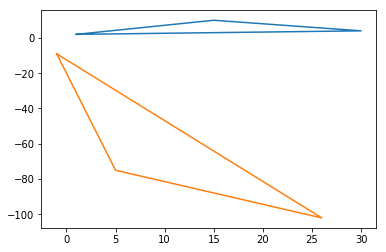

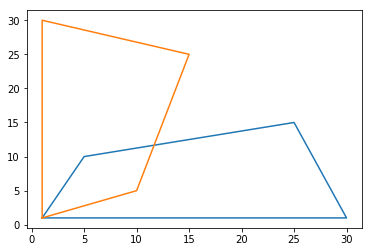

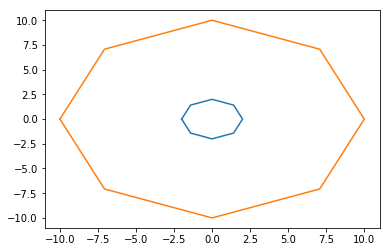

In [39]:
def f(x,y):
    return (x-y,-3*x-3*y)

plot([1,30,15,1],[2,4,10,2])
new_poly = nouveau_poly(f,[[1,2],[30,4],[15,10],[1,2]])
plot(new_poly[0],new_poly[1])
show()


def f(x,y):
    return (y,x)

plot([1,30,25,5,1],[1,1,15,10,1])
new_poly = nouveau_poly(f,[[1,1],[30,1],[25,15],[5,10],[1,1]])
plot(new_poly[0],new_poly[1])
show()


def f(x,y):
    return (5.*x,5.*y)

plot([-2,-np.sqrt(2),0,np.sqrt(2),2,np.sqrt(2),0,-np.sqrt(2),-2],
         [0,-np.sqrt(2),-2,-np.sqrt(2),0,np.sqrt(2),2,np.sqrt(2),0])
new_poly = nouveau_poly(f,[[-2,0],[-np.sqrt(2),-np.sqrt(2)],[0,-2],
                   [np.sqrt(2),-np.sqrt(2)],[2,0],[np.sqrt(2),np.sqrt(2)],
                   [0,2],[-np.sqrt(2),np.sqrt(2)],[-2,0]])
plot(new_poly[0],new_poly[1])
show()

# Exercice 3

On cherche à présent à déterminer l'intersection d'un plan et d'un cube dans $\mathbb{R}^3$. On représentera un plan $P$ de $\mathbb{R}^3$ par un quadruplet de nombres réels $(a,b,c,d)$ tel que :
\begin{equation}
(x,y,z)\in P \Longleftrightarrow ax+by+cz+d=0.
\end{equation}

Sachant qu'un tel plan sépare $\mathbb{R}^3$ en deux demi-espaces caractérisés par les inégalités $ax+by+cz+d <0$ et $ax+by+cz+D>0$, écrire une fonction InterSeg qui prend en entrée le quadruplet $(a,b,c,d)$ qui caractérise notre plan $P$ ainsi que les coordonnées de deux points $M$ et $N$, et renvoie en sortie "All" si le segment $[MN]$ est inclus dans le plan $P$, les coordonnées du point d'intersection entre le $P$ et $[MN]$ s'il existe et "None" s'il n'y a aucun point d'intersection.

In [40]:
def InterSeg(P,M,N):
    m=P[0]*M[0]+P[1]*M[1]+P[2]*M[2]+P[3]
    n=P[0]*N[0]+P[1]*N[1]+P[2]*N[2]+P[3]
    if m*n>0.:
        res="None"
    elif m==0. and n==0.:
        res="All"
    else:
        res=M+(m/(m-n))*(N-M)
    return res

Tester la fonction pour le plan d'équation $z-1=0$, et les segments $[AB]$, $[CD]$ et $[EF]$ où $A=(0,0,0)$, $B=(0,0,2)$, $C=(1,1,3)$, $D=(0,-6,4)$, $E=(8,0,1)$ et $F=(12,-9,1)$.

In [41]:
A=array([0.,0.,0.])
B=array([0.,0.,2.])
C=array([1.,1.,3.])
D=array([0.,-6.,4.])
E=array([8.,0.,1.])
F=array([12.,-9.,1.])
P=array([0.,0.,1.,-1.])
print(InterSeg(P,A,B))
print(InterSeg(P,C,D))
print(InterSeg(P,E,F))

[ 0.  0.  1.]
None
All


Ecrire une fonction InterCube qui prend en entrée un plan $P$ (sous la forme d'un quadruplet) et renvoie, à l'aide de la fonction InterSeg, les sommets du polygone d'intersection entre le plan et le cube $[0,1]^3$ s'il existe, et "None" si cette intersection est vide. On pourra supposer qu'aucune arête du cube n'est incluse dans le plan $P$. La tester pour les plans d'équation $z-0.3=0$ et $x+y+z-1.5=0$.

In [42]:
def InterCube(P):
    res=[]
    A=array([0.,0.,0.])
    B=array([0.,0.,1.])
    C=array([0.,1.,0.])
    D=array([0.,1.,1.])
    E=array([1.,0.,0.])
    F=array([1.,0.,1.])
    G=array([1.,1.,0.])
    H=array([1.,1.,1.])
    
    X=InterSeg(P,A,B)
    if X!="None":
               res = res + [X.tolist()]
    
    X=InterSeg(P,A,C)
    if X!="None":
               res = res + [X.tolist()]
    
    X=InterSeg(P,B,D)
    if X!="None":
               res = res + [X.tolist()]
    
    X=InterSeg(P,C,D)
    if X!="None":
               res = res + [X.tolist()]
    
    X=InterSeg(P,A,E)
    if X!="None":
               res = res + [X.tolist()]
    
    X=InterSeg(P,B,F)
    if X!="None":
               res = res + [X.tolist()]
    
    X=InterSeg(P,D,H)
    if X!="None":
               res = res + [X.tolist()]
    
    X=InterSeg(P,C,G)
    if X!="None":
               res = res + [X.tolist()]
         
    X=InterSeg(P,E,F)
    if X!="None":
               res = res + [X.tolist()]
    
    X=InterSeg(P,F,H)
    if X!="None":
               res = res + [X.tolist()]
    
    X=InterSeg(P,H,G)
    if X!="None":
               res = res + [X.tolist()]
    
    X=InterSeg(P,G,E)
    if X!="None":
               res = res + [X.tolist()]

    return res

print(InterCube(array([0.,0.,1.,-0.3])))
print(InterCube(array([1.,1.,1.,-1.5])))

[[0.0, 0.0, 0.3], [0.0, 1.0, 0.3], [1.0, 0.0, 0.3], [1.0, 1.0, 0.30000000000000004]]
[[0.0, 0.5, 1.0], [0.0, 1.0, 0.5], [0.5, 0.0, 1.0], [0.5, 1.0, 0.0], [1.0, 0.0, 0.5], [1.0, 0.5, 0.0]]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:45: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:53: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.